In [51]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

data =arff.loadarff('C:\\Users\\Tanvi Chouhan\\Desktop\\New Folder\\cm1.arff')
df=pd.DataFrame(data[0])
df.head()
 

 #frames = [df1, df2, df3, df4, df5]
 #result = pd.concat([df1, df2, df3, df4, df5])

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,b'false'
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,b'true'
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1.0,0.0,6.0,0.0,15.0,15.0,44.0,19.0,9.0,b'false'
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0.0,0.0,3.0,0.0,16.0,8.0,31.0,16.0,7.0,b'false'
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0.0,0.0,3.0,0.0,16.0,12.0,46.0,26.0,11.0,b'false'


In [52]:
import pandas as pd
import numpy as np

X = df.iloc[:,:-1].values
y = df.iloc[:, 21].values

#X=X[400:498,:]
#y=y[400:498]
#print(ykc2)

In [53]:
labelscm1=[]
for i in range(len(y)):
    if y[i]== b'false' or y[i]== b'no':
            labels.append(0)
    if y[i]== b'true' or y[i]==b'yes':
           labels.append(1)
labelsbefore = np.array(labels)

#print(labelsjm1)
#print(labelsbeforecm1)
#print(ycm1)

In [54]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(labels)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


print(X_train.shape)
print(X_test.shape)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Dimensionality reduction
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 6, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)


#explained_variance = pca.explained_variance_ratio_
#explained_variance


print(X_train.shape)
print(X_test.shape)

(348, 21)
(150, 21)
(348, 6)
(150, 6)


In [5]:
#X_train = np.array(X_train).astype(np.float)
#y_train = np.array(y_train).astype(np.float)
#X_test = np.array(X_test).astype(np.float)
#y_test = np.array(y_test).astype(np.float)

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#print(X_test)
#print(y_test)
#applying nb
model = GaussianNB()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

accuracycm = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % accuracycm)
# precision tp / (tp + fp)
precisioncm = precision_score(y_test,y_pred)
print('Precision: %f' % precisioncm)
# recall: tp / (tp + fn)
recallcm = recall_score(y_test,y_pred)
print('Recall: %f' % recallcm)
# f1: 2 tp / (2 tp + fp + fn)
f1cm = f1_score(y_test,y_pred)
print('F1 score: %f' % f1cm)

with open('nbcm_acc.pkl','wb') as my_file_obj:
    pickle.dump(accuracycm,my_file_obj) 
with open('nbcm_pre.pkl','wb') as my_file_obj:
    pickle.dump(precisioncm,my_file_obj) 
with open('nbcm_recall.pkl','wb') as my_file_obj:
    pickle.dump(recallcm,my_file_obj)
with open('nbcm_f1.pkl','wb') as my_file_obj:
    pickle.dump(f1cm,my_file_obj)

    print("Files Stored Successfully")


Accuracy: 0.860000
Precision: 0.222222
Recall: 0.125000
F1 score: 0.160000
Files Stored Successfully


[[127   7]
 [ 14   2]]


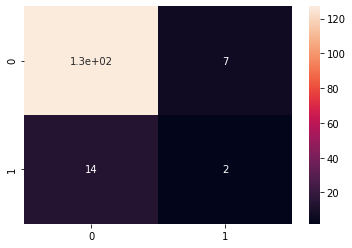

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import pickle

#print(accuracy)

results = confusion_matrix(y_test,y_pred)
print(results)
sn.heatmap(results,annot=True)
plt.show()

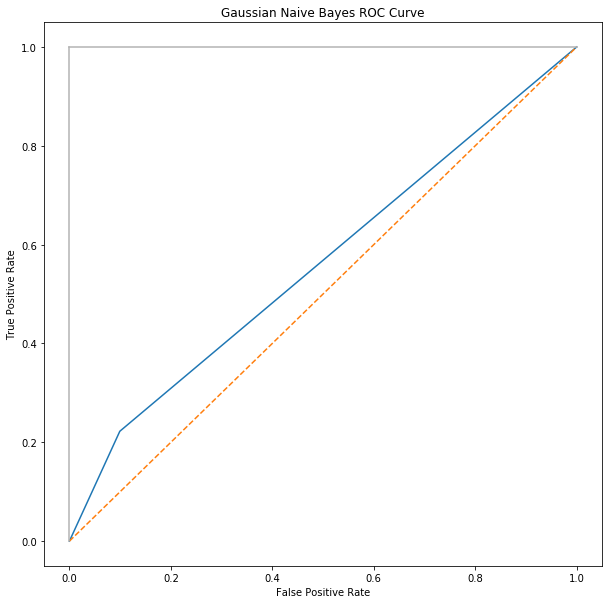

In [58]:
from sklearn.metrics import roc_curve
a, b, c = roc_curve(y_pred,y_test)
plt.subplots(1, figsize=(10,10))
plt.title('Gaussian Naive Bayes ROC Curve')
plt.plot(a, b)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()